# Proyek Analisis Data: Air Quality
- Nama: Muhammad Fadhil Abidin
- Email: abidinfadhil@gmail.com
- Id Dicoding: mufiiin

# Pertanyaan Bisnis:
1. Berdasarkan dataset PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Dingling, Aotizhongxin, dan Changping), bagaimana tren polusi udara pada selama lima tahun?
2. Apakah ada korelasi antara parameter cuaca seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) dengan tingkat polusi PM2.5 selama 5 tahun terakhir?

## A. Menyiapkan Library:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## B. Data Wrangling

### 1. Gathering Data

In [ ]:
df1 = pd.read_csv('/content/PRSA_Data_Dingling_20130301-20170228.csv')
df2 = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df3 = pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv')
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
105188,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
105189,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
105190,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


### 2. Assesing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       105192 non-null  int64  
 1   year     105192 non-null  int64  
 2   month    105192 non-null  int64  
 3   day      105192 non-null  int64  
 4   hour     105192 non-null  int64  
 5   PM2.5    102714 non-null  float64
 6   PM10     103236 non-null  float64
 7   SO2      102899 non-null  float64
 8   NO2      102268 non-null  float64
 9   CO       99883 non-null   float64
 10  O3       101655 non-null  float64
 11  TEMP     105066 non-null  float64
 12  PRES     105072 non-null  float64
 13  DEWP     105066 non-null  float64
 14  RAIN     105070 non-null  float64
 15  wd       104831 non-null  object 
 16  WSPM     105092 non-null  float64
 17  station  105192 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 14.4+ MB


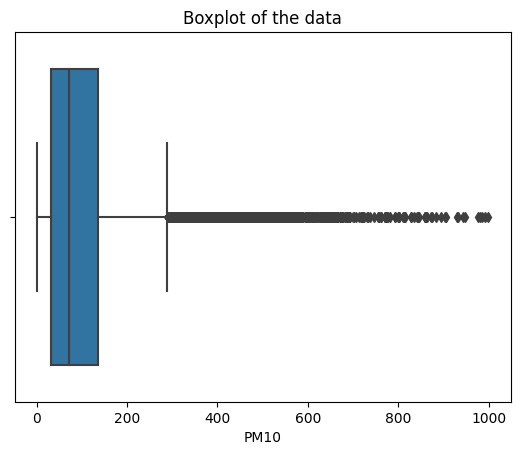

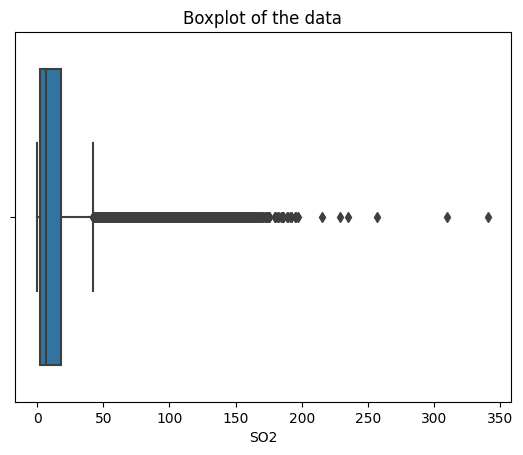

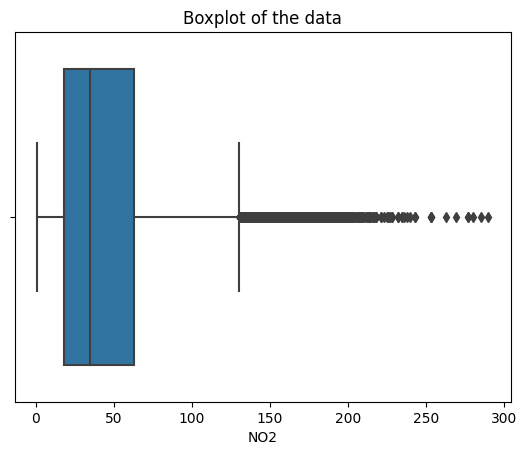

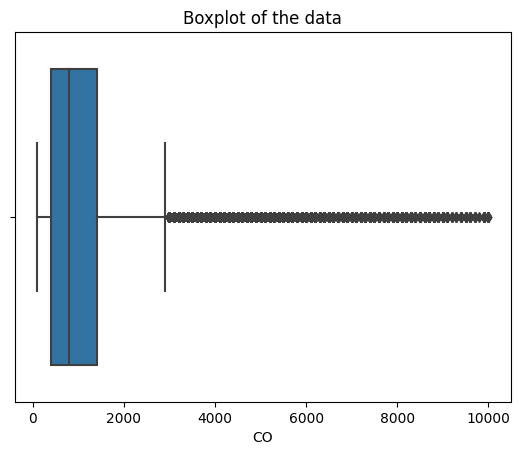

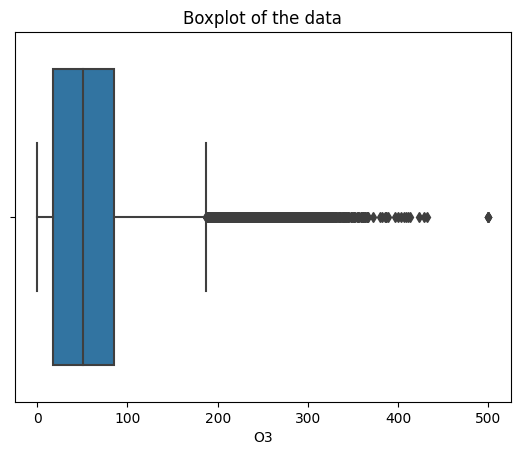

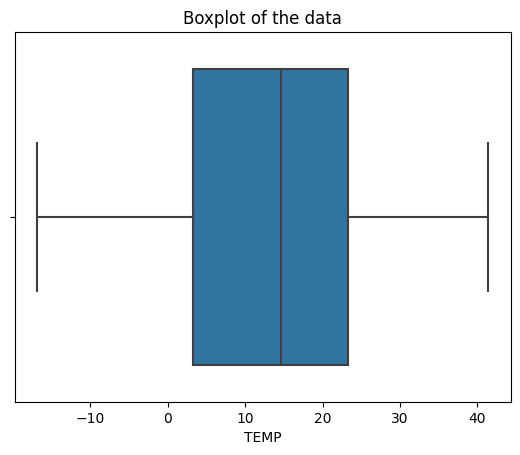

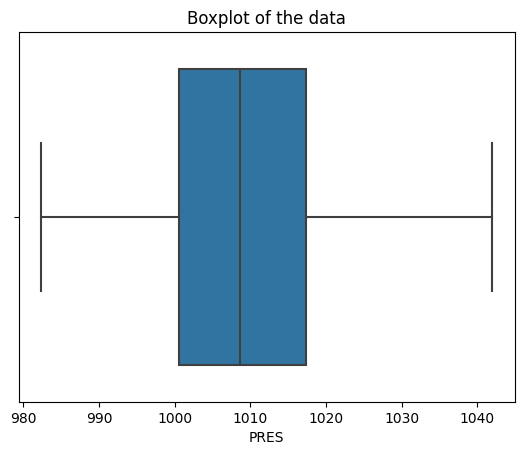

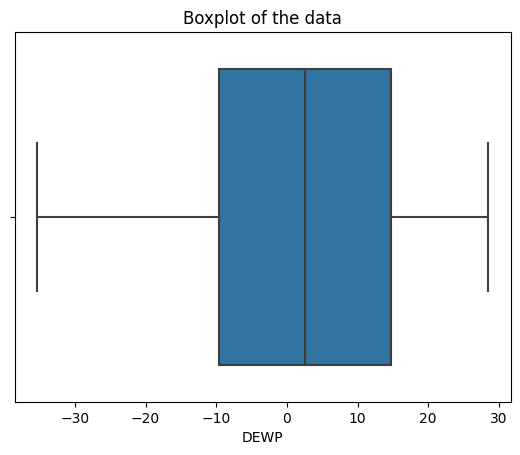

In [ ]:
for i in df.columns[6:14]:
    sns.boxplot(x=df[i])
    plt.title('Boxplot of the data')
    plt.show()

### 3. Cleaning Data

In [ ]:
#Removing Outliers with the Interquartile Range Method (IQR)

Q1 = df.quantile(0.25) #first 25% of the data
Q3 = df.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 2 #For Normal Distributions, scale = 1.5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (df[df.columns[6:14]] < lower_lim)
upper_outliers = (df[df.columns[6:14]] > upper_lim)

<ipython-input-4-36120a3a3f73>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25) #first 25% of the data
<ipython-input-4-36120a3a3f73>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75) #first 75% of the data
<ipython-input-4-36120a3a3f73>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_outliers = (df[df.columns[6:14]] < lower_lim)
<ipython-input-4-36120a3a3f73>:12: FutureWarning: Automatic reindexing on DataFrame vs S

In [ ]:
#Checking the resulting outliers calculated by the above method (represented below as non-null values)
df[df.columns[6:14]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    1908 non-null   float64
 1   SO2     6361 non-null   float64
 2   NO2     836 non-null    float64
 3   CO      4299 non-null   float64
 4   O3      2110 non-null   float64
 5   TEMP    0 non-null      float64
 6   PRES    0 non-null      float64
 7   DEWP    0 non-null      float64
dtypes: float64(8)
memory usage: 6.4 MB


In [ ]:
#Create new DataFrame without the outliers
num_cols = list(df.columns[6:14])
df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * IQR)) |(df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
df_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93016 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       93016 non-null  int64  
 1   year     93016 non-null  int64  
 2   month    93016 non-null  int64  
 3   day      93016 non-null  int64  
 4   hour     93016 non-null  int64  
 5   PM2.5    90632 non-null  float64
 6   PM10     91087 non-null  float64
 7   SO2      90759 non-null  float64
 8   NO2      90176 non-null  float64
 9   CO       88078 non-null  float64
 10  O3       89683 non-null  float64
 11  TEMP     92905 non-null  float64
 12  PRES     92911 non-null  float64
 13  DEWP     92905 non-null  float64
 14  RAIN     92909 non-null  float64
 15  wd       92711 non-null  object 
 16  WSPM     92927 non-null  float64
 17  station  93016 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 13.5+ MB


<ipython-input-6-6dc66c8dfce5>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * IQR)) |(df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
<ipython-input-6-6dc66c8dfce5>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out_IQR = df[~((df[num_cols] < (Q1 - 2 * IQR)) |(df[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]


In [ ]:
df_out_IQR['PM2.5'] = df_out_IQR['PM2.5'].fillna(df_out_IQR['PM2.5'].median())
df_out_IQR['CO'] = df_out_IQR['CO'].fillna(df_out_IQR['CO'].median())
df_out_IQR['PM10'] = df_out_IQR['PM10'].fillna(df_out_IQR['PM10'].median())
df_out_IQR['TEMP'] = df_out_IQR['TEMP'].fillna(df_out_IQR['TEMP'].median())
df_out_IQR['PRES'] = df_out_IQR['PRES'].fillna(df_out_IQR['PRES'].median())
df_out_IQR['DEWP'] = df_out_IQR['DEWP'].fillna(df_out_IQR['DEWP'].median())

<ipython-input-13-102153b9c8cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_IQR['PM2.5'] = df_out_IQR['PM2.5'].fillna(df_out_IQR['PM2.5'].median())
<ipython-input-13-102153b9c8cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_IQR['CO'] = df_out_IQR['CO'].fillna(df_out_IQR['CO'].median())
<ipython-input-13-102153b9c8cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

## C. Exploratory Data Analyst (EDA)

In [ ]:
df_out_IQR[['PM2.5','PM10', 'CO', 'TEMP', 'PRES', 'DEWP']].describe()

,PM2.5,PM10,CO,TEMP,PRES,DEWP
count,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000,93016.000000
mean,58.515416,79.051147,860.056958,14.266551,1008.794612,2.473368
std,56.802468,63.905553,632.914529,11.069396,10.467938,14.022074
min,2.000000,2.000000,100.000000,-16.800000,982.400000,-35.300000
25%,16.000000,29.000000,400.000000,4.600000,1000.300000,-9.700000
50%,40.000000,62.000000,700.000000,15.700000,1008.100000,3.800000
75%,83.000000,112.050000,1100.000000,23.500000,1017.000000,15.100000
max,510.000000,341.000000,3400.000000,41.400000,1042.000000,28.500000


In [ ]:
df_out_IQR['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

<ipython-input-18-7979b9cd3cfe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_out_IQR['PRES'], hist=True, kde=False,


Text(0, 0.5, 'Count')

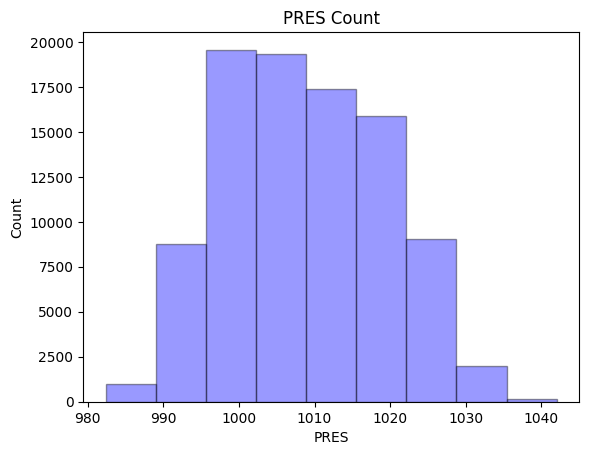

In [ ]:
# seaborn histogram
sns.distplot(df_out_IQR['PRES'], hist=True, kde=False,
             bins=9, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('PRES Count')
plt.xlabel("PRES")
plt.ylabel('Count')

## D. Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan dataset PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Dingling, Aotizhongxin, dan Changping), bagaimana tren polusi udara pada selama lima tahun?

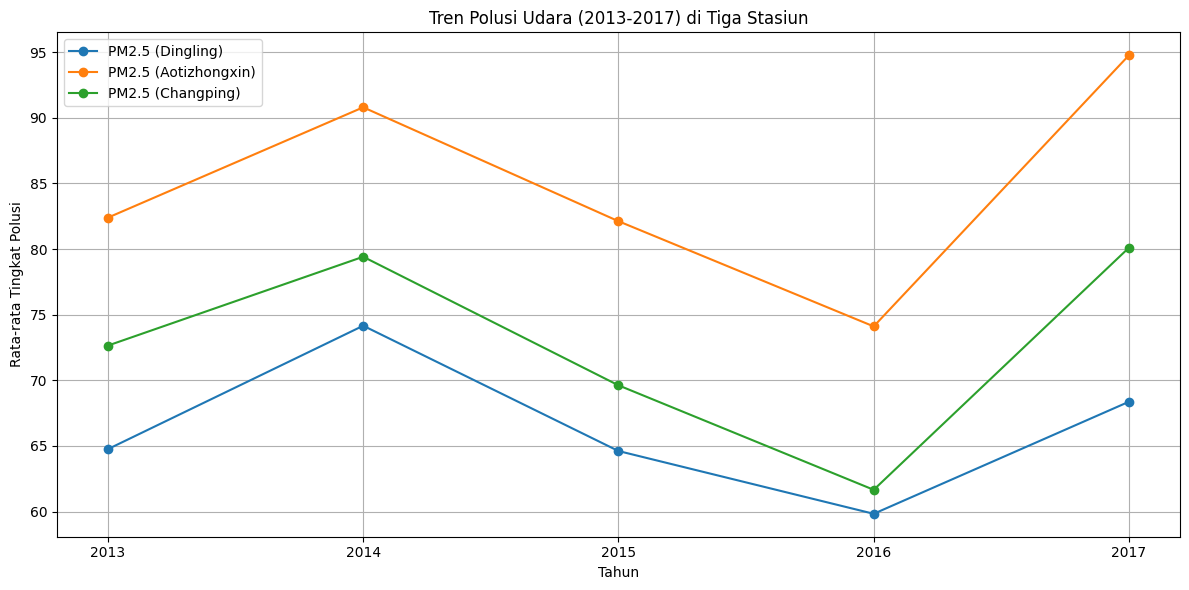

In [ ]:
# Mengelompokkan data berdasarkan tahun dan stasiun, serta menghitung rata-rata tingkat PM2.5, PM10, dan CO
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

# Membuat plot tren untuk PM2.5, PM10, dan CO di tiga stasiun
plt.figure(figsize=(12, 6))
for station in ['Dingling', 'Aotizhongxin', 'Changping']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['PM2.5'], label=f'PM2.5 ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

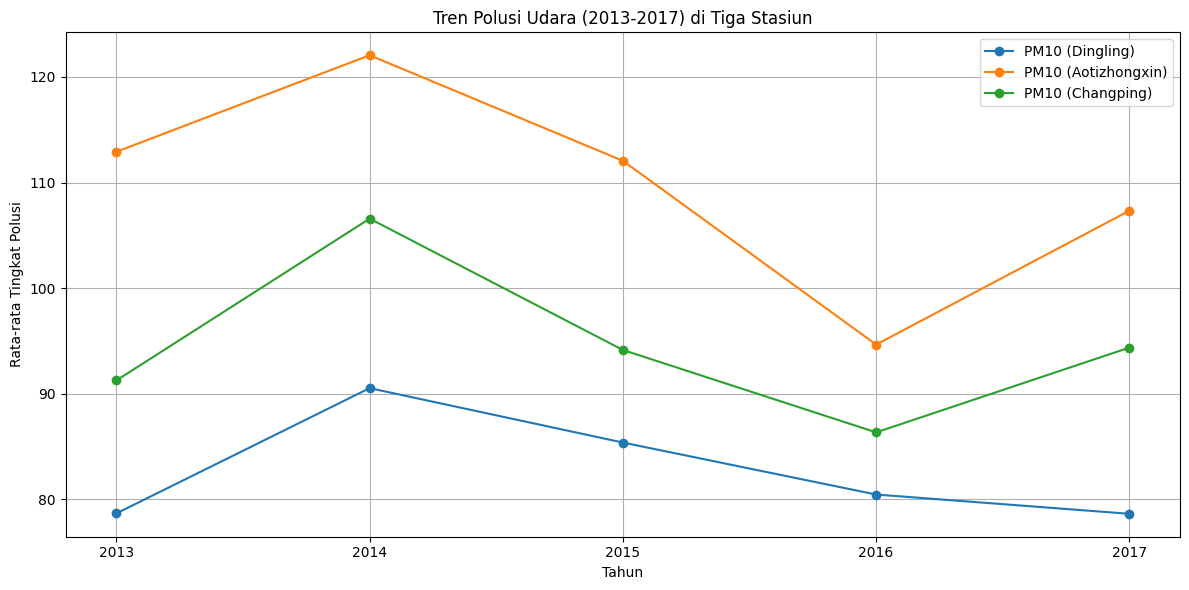

In [ ]:
# Mengelompokkan data berdasarkan tahun dan stasiun, serta menghitung rata-rata tingkat PM2.5, PM10, dan CO
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

# Membuat plot tren untuk PM2.5, PM10, dan CO di tiga stasiun
plt.figure(figsize=(12, 6))
for station in ['Dingling', 'Aotizhongxin', 'Changping']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['PM10'], label=f'PM10 ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

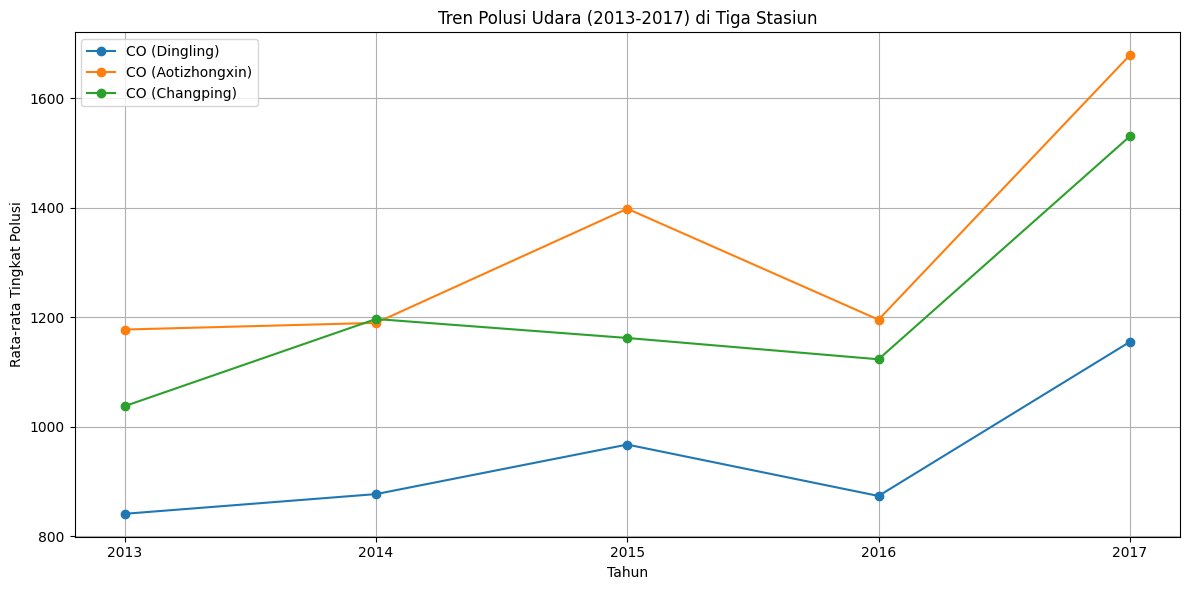

In [ ]:
# Mengelompokkan data berdasarkan tahun dan stasiun, serta menghitung rata-rata tingkat PM2.5, PM10, dan CO
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

# Membuat plot tren untuk PM2.5, PM10, dan CO di tiga stasiun
plt.figure(figsize=(12, 6))
for station in ['Dingling', 'Aotizhongxin', 'Changping']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['CO'], label=f'CO ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah ada korelasi antara parameter cuaca seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) dengan tingkat polusi PM2.5 selama 5 tahun terakhir?

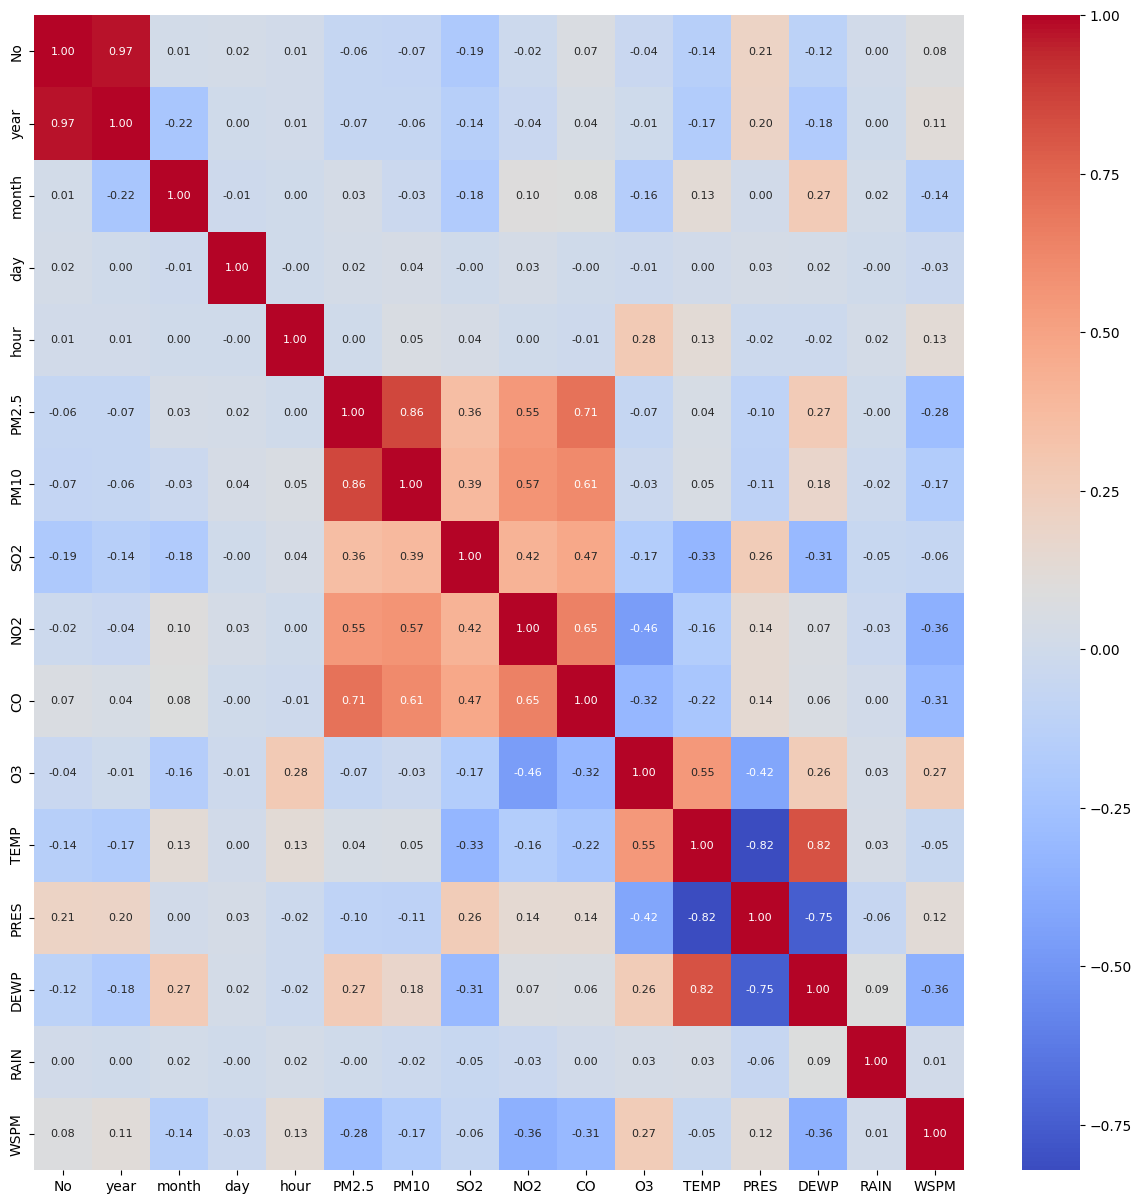

In [ ]:
# Memilih data numeric
numeric_df = df_out_IQR.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi untuk setiap matrix(numeric) yang ada
corr_matrix = numeric_df.corr()

# Ukuran output
plt.figure(figsize=(15, 15))

# Heatmap dengan custom display
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Memanggil heatmap
plt.show()

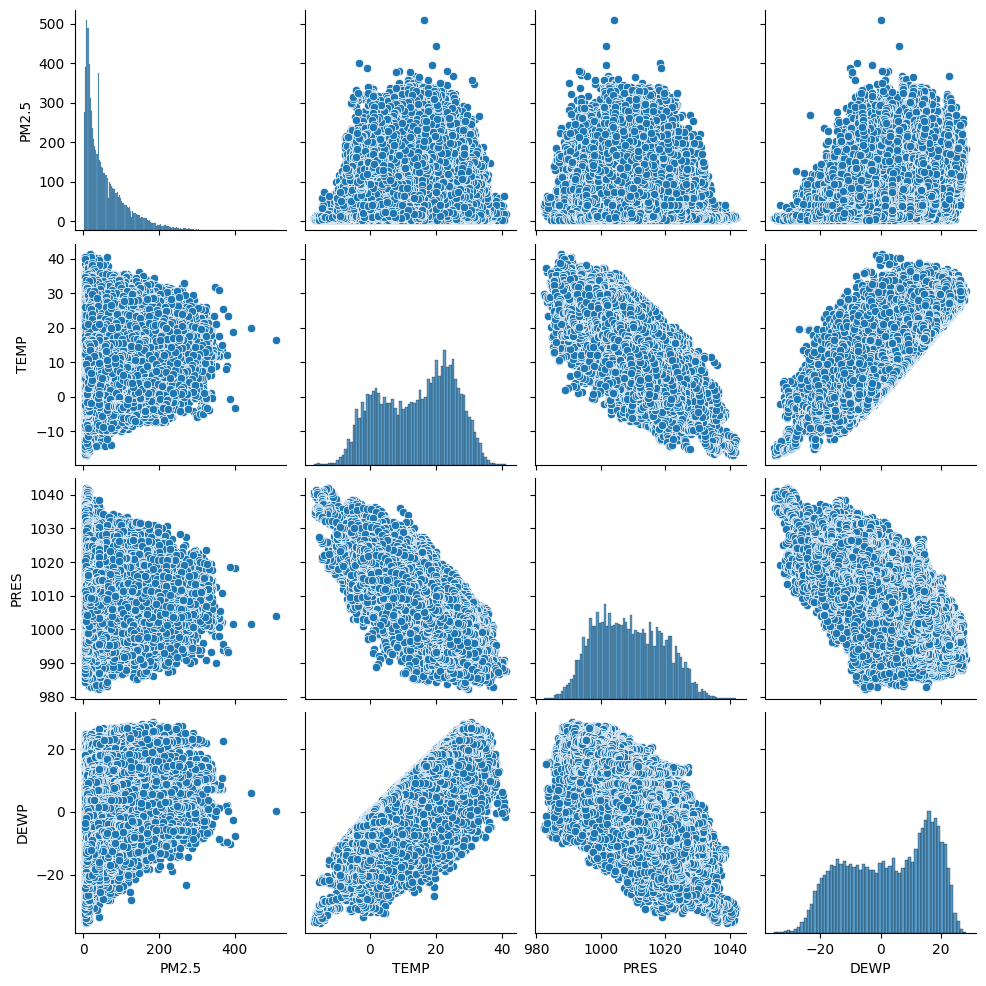

In [ ]:
# Ambil hanya kolom ke-4 hingga ke-7 dari DataFrame df1_use
selected_columns = df_out_IQR[['PM2.5','TEMP', 'PRES', 'DEWP']]

# Buat pairplot hanya dengan kolom-kolom yang dipilih
sns.pairplot(selected_columns)

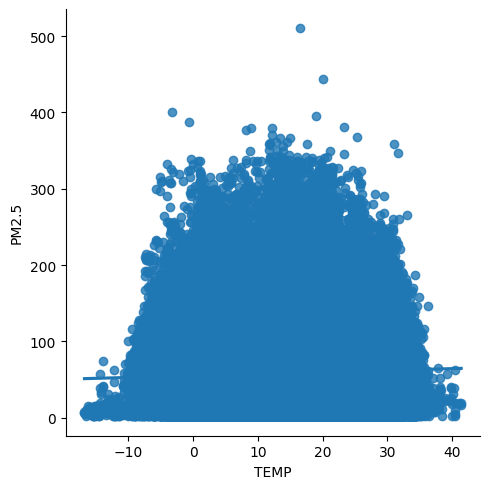

In [ ]:
sns.lmplot(x='TEMP',y='PM2.5', data = df_out_IQR)

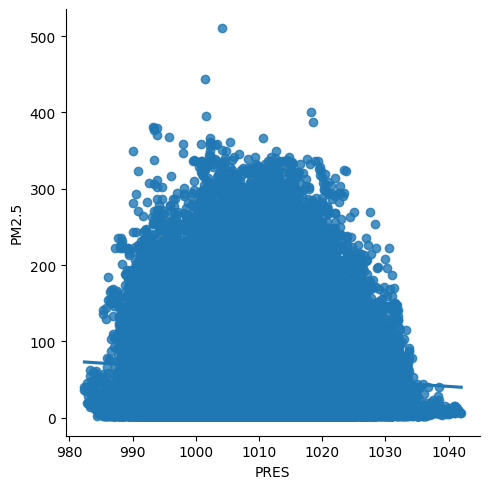

In [ ]:
sns.lmplot(x='PRES',y='PM2.5', data = df_out_IQR)

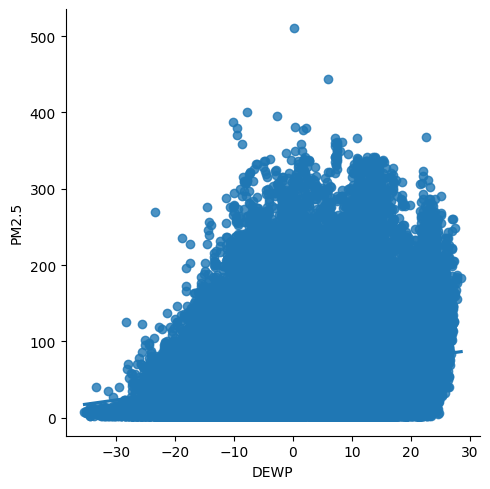

In [ ]:
sns.lmplot(x='DEWP',y='PM2.5', data = df_out_IQR)

## E. Conclusion

###Conclution Pertanyaan 1:
>Berdasarkan dataset PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Dingling, Aotizhongxin, dan Changping), bagaimana tren polusi udara pada selama lima tahun?

> 1. PM2.5:
> - Dingling: Tren penurunan dari 2013 ke 2016, kemudian sedikit meningkat di 2017.
> - Aotizhongxin: Tren fluktuasi dari tahun ke tahun tanpa adanya tren yang jelas.
> - Changping: Tren penurunan dari 2013 ke 2016, kemudian sedikit meningkat di 2017.

> 2. PM10:
> - Dingling: Tren penurunan dari 2013 ke 2016, kemudian kembali ke tingkat awal di 2017.
> - Aotizhongxin: Tren penurunan yang cukup konsisten dari 2013 ke 2016, kemudian sedikit meningkat di 2017.
> - Changping: Tren penurunan dari 2013 ke 2016, kemudian sedikit meningkat di 2017.

> 3. CO:
> - Dingling: Tren fluktuasi dari tahun ke tahun, tetapi dengan peningkatan signifikan pada tahun 2017.
> - Aotizhongxin: Tren fluktuasi dari tahun ke tahun dengan peningkatan yang signifikan pada tahun 2015 dan 2017.
> - Changping: Tren fluktuasi dari tahun ke tahun, dengan peningkatan signifikan pada tahun 2017.

>Berdasarkan data tersebut, polusi udara di tiga stasiun tersebut memiliki tren yang berbeda selama lima tahun terakhir:

> - PM2.5: Dingling dan Changping menunjukkan tren penurunan yang lebih jelas, sedangkan Aotizhongxin cenderung fluktuatif.
> - PM10: Dingling dan Changping juga menunjukkan tren penurunan, sementara Aotizhongxin mengalami penurunan yang lebih signifikan pada awal periode.
> - CO: ketiga stasiun memiliki fluktuasi dari tahun ke tahun, tetapi semuanya mengalami peningkatan yang signifikan pada tahun 2017.

>Berdasarkan analisi tersebut Dingling cenderung memiliki kualitas udara yang lebih baik daripada Aotizhongxin dan Changping berdasarkan rata-rata tingkat PM2.5, PM10, dan CO selama lima tahun.
###Conclution Pertanyaan 2:

> Apakah ada korelasi antara parameter cuaca seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) dengan tingkat polusi PM2.5 selama 5 tahun terakhir?

> Dari nilai korelasi yang ada:
- PM2.5 dengan TEMP = 0.04
- PM2.5 dengan PRES = -0.10
- PM2.5 dengan DEWP = 0.27

>Didapatkan bahwa nilai-nilai korelasi yang rendah (mendekati nol) menunjukkan bahwa hubungan antara parameter cuaca (suhu, tekanan udara, kelembaban) dengan tingkat polusi PM2.5 sangat lemah. Berikut rincian penjelasannya:

>1. **Suhu (TEMP)**: Korelasi antara suhu dan PM2.5 sangat rendah (0.04). Ini berarti bahwa perubahan suhu tidak secara signifikan memengaruhi tingkat polusi PM2.5 dalam 5 tahun terakhir.

>2. **Tekanan Udara (PRES)**: Korelasi antara tekanan udara dan PM2.5 juga rendah (-0.10). Ini menunjukkan bahwa tidak ada hubungan kuat antara tekanan udara dan tingkat polusi PM2.5. Korelasi negatif yang lemah menunjukkan bahwa peningkatan tekanan udara tidak secara signifikan mengurangi tingkat polusi PM2.5.

>3. **Kelembaban (DEWP)**: Korelasi antara kelembaban dan PM2.5 sedikit lebih tinggi (0.27), tetapi masih termasuk dalam kategori korelasi yang rendah. Ini bisa menunjukkan bahwa ada sedikit hubungan positif antara kelembaban dan tingkat polusi PM2.5, tetapi korelasi ini masih lemah untuk dianggap sebagai faktor utama yang memengaruhi polusi PM2.5.

>Jadi, berdasarkan nilai korelasi dapat disimpulkan bahwa hubungan antara parameter cuaca (suhu, tekanan udara, kelembaban) dengan tingkat polusi PM2.5 selama 5 tahun terakhir sangat lemah. Faktor-faktor lain mungkin memiliki pengaruh yang lebih besar pada tingkat polusi PM2.5, atau ada faktor-faktor non-linear atau luar yang tidak terlihat dalam analisis korelasi ini yang memengaruhi polusi PM2.5. Oleh karena itu, analisis lebih lanjut mungkin diperlukan untuk memahami dengan lebih baik faktor-faktor yang memengaruhi tingkat polusi PM2.5.



In [ ]:
from google.colab import files
df_out_IQR.to_csv('main_data.csv', index=False)
files.download('main_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>